## K-Means clustering

Learn how to create clusters using Scikit-learn and the Nigerian music dataset. We will cover the basics of K-Means for Clustering. There are many ways to work with clusters and the method we use depends on your data. We will try K-Means as it's the most common clustering technique.

K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region.


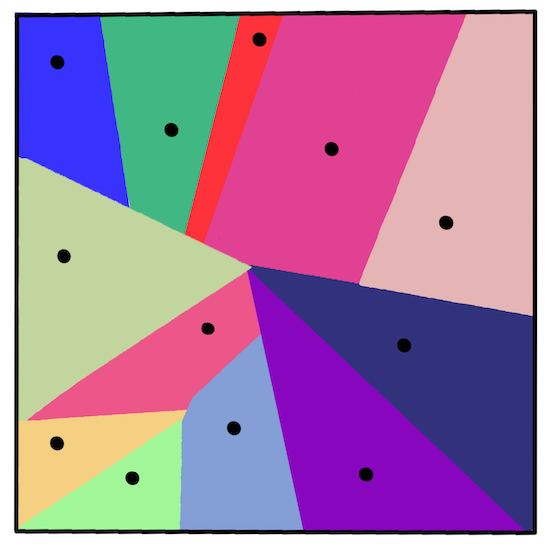


The K-Means clustering process executes in a three-step process:

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
1) It assigns each sample to the nearest centroid.
2) It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
3) Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'.



# Nigerian Music scraped from Spotify - an analysis

In [1]:
# Seaborn 패키지 설치
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [48]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
font_path = './fonts/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

# 현재 작업 경로 확인
current_directory = os.getcwd()
print(current_directory)

FileNotFoundError: [Errno 2] No such file or directory: './fonts/NanumGothic.ttf'

In [5]:
# 서울시 안심이 CCTV 연계 현황 데이터 불러오기
cctv_df = pd.read_csv("./Data/서울시 안심이 CCTV 연계 현황.csv", encoding='cp949')

# 읽어온 데이터 프레임 확인
print("========== 서울특별시 안심이 CCTV 연계 현황 ==========")
print(cctv_df)

========== 서울특별시 안심이 CCTV 연계 현황 ==========
       자치구                             안심 주소       위도        경도  CCTV 수량  \
0      중랑구  중화2동 325-103 (공원 입구)_C-JH02-0035  37.5958  127.0709        1   
1      중랑구       신내1동 819(고정2)_C-SN01-0029-B  37.6135  127.1113        1   
2      중랑구   중화2동 325-103(고정1)_C-JH02-0035-A  37.5958  127.0709        1   
3      중랑구       신내1동 819(고정1)_C-SN01-0029-A  37.6135  127.1113        1   
4      중랑구   중화2동 325-103(고정2)_C-JH02-0035-B  37.5958  127.0709        1   
...    ...                               ...      ...       ...      ...   
83729  강남구                        대치2-256-02  37.5059  127.0589        1   
83730  강남구                         수서-208-01  37.4902  127.1014        1   
83731  강남구                         수서-208-02  37.4902  127.1014        1   
83732  강남구                        대치2-256-03  37.5059  127.0589        1   
83733  강남구                         수서-208-03  37.4902  127.1014        1   

            수정 일시  
0      2022-12-01  
1   

In [7]:
# 자치구단위 서울생활인구 일별 집계표 데이터 불러오기
pop_df = pd.read_csv("./Data/자치구단위 서울생활인구 일별 집계표.csv", encoding='cp949')

# 읽어온 데이터 프레임 확인
print("========== 자치구단위 서울생활인구 현황 ==========")
print(pop_df)

========== 자치구단위 서울생활인구 현황 ==========
          기준일ID  시군구코드 시군구명        총생활인구수      내국인생활인구수   장기체류외국인인구수  \
0      20240421  11000  서울시  1.048440e+07  9.937015e+06  387083.4422   
1      20240421  11110  종로구  2.687531e+05  2.356983e+05   17095.3463   
2      20240421  11140   중구  2.520925e+05  1.942265e+05   17807.3403   
3      20240421  11170  용산구  2.927820e+05  2.666552e+05   15877.1674   
4      20240421  11200  성동구  3.400600e+05  3.224420e+05   15060.6535   
...         ...    ...  ...           ...           ...          ...   
57091  20180405  11620  관악구  5.272641e+05  5.036422e+05   22109.7135   
57092  20180405  11650  서초구  6.570409e+05  6.366557e+05   14811.8716   
57093  20180405  11680  강남구  9.128639e+05  8.713715e+05   22101.3558   
57094  20180405  11710  송파구  7.733757e+05  7.531781e+05   14761.5934   
57095  20180405  11740  강동구  4.893388e+05  4.783264e+05    9807.4046   

        단기체류외국인인구수        일최대인구수        일최소인구수  주간인구수(09~18)  야간인구수(19~08)  \
0      160301.3292 

In [9]:
# 데이터 프레임에서 NaN 값 개수 확인
nan_values1 = cctv_df.isna().sum()
print(nan_values1)

nan_values2 = pop_df.isna().sum()
print(nan_values2)

자치구        0
안심 주소      0
위도         0
경도         0
CCTV 수량    0
수정 일시      0
dtype: int64
기준일ID             0
시군구코드             0
시군구명              0
총생활인구수            0
내국인생활인구수          0
장기체류외국인인구수        0
단기체류외국인인구수        0
일최대인구수            0
일최소인구수            0
주간인구수(09~18)      0
야간인구수(19~08)      0
일최대이동인구수          0
서울외유입인구수          0
동일자치구행정동간이동인구수    0
자치구간이동인구수         0
dtype: int64


### 데이터 전처리

#### 데이터프레임의 열에 대한 설명:

- 자치구: 
- 안심이_CCTV: 
- 생활인구수: 

In [26]:
# 자치구별 안심이_CCTV 개수 카운트
cctv_counts = cctv_df.groupby('자치구').size().reset_index(name='안심이_CCTV수')

# 데이터프레임으로 변환
cctv_counts_df = pd.DataFrame(cctv_counts)

print(cctv_counts_df)

     자치구  안심이_CCTV수
0    강남구       7007
1    강동구       3191
2    강북구       2858
3    강서구       3210
4    관악구       5366
5    광진구       4091
6    구로구       4050
7    금천구       2725
8    노원구       2655
9    도봉구       1598
10  동대문구       2857
11   동작구       2650
12   마포구       2450
13  서대문구       3223
14   서초구       5060
15   성동구       4036
16   성북구       3943
17   송파구       3094
18   양천구       3845
19  영등포구       2899
20   용산구       1078
21   은평구       4111
22   종로구       1930
23    중구       2336
24   중랑구       3471


In [35]:
# 최근일기준으로 서울생활인구 설정
filtered_df = pop_df[pop_df['기준일ID'] == 20240421]

# 서울시 전체를 제외한 자치구의 데이터로 설정
filtered_df = filtered_df[filtered_df['시군구명'] != '서울시']

# 총생활인구수 열만 추출
filtered_df = filtered_df[['시군구명', '총생활인구수']]

# '시군구명'열을 '자치구'로 통일
pop_counts_df = filtered_df.rename(columns={'시군구명': '자치구'})

# 총생활인구수의 소수점 삭제
pop_counts_df['총생활인구수'] = pop_counts_df['총생활인구수'].round().astype(int)

print(pop_counts_df)

     자치구  총생활인구수
1    종로구  268753
2     중구  252092
3    용산구  292782
4    성동구  340060
5    광진구  389777
6   동대문구  369899
7    중랑구  355970
8    성북구  441873
9    강북구  287656
10   도봉구  270435
11   노원구  494858
12   은평구  442641
13  서대문구  370302
14   마포구  468916
15   양천구  381326
16   강서구  543343
17   구로구  421001
18   금천구  214854
19  영등포구  486396
20   동작구  395166
21   관악구  491101
22   서초구  517923
23   강남구  730918
24   송파구  736835
25   강동구  519524


In [37]:
# 자치구를 기준으로 안심이_CCTV수 데이터프레임과 총생활인구수 데이터프레임을 병합
merged_df = pd.merge(cctv_counts_df, pop_counts_df, on='자치구')

print(merged_df)

     자치구  안심이_CCTV수  총생활인구수
0    강남구       7007  730918
1    강동구       3191  519524
2    강북구       2858  287656
3    강서구       3210  543343
4    관악구       5366  491101
5    광진구       4091  389777
6    구로구       4050  421001
7    금천구       2725  214854
8    노원구       2655  494858
9    도봉구       1598  270435
10  동대문구       2857  369899
11   동작구       2650  395166
12   마포구       2450  468916
13  서대문구       3223  370302
14   서초구       5060  517923
15   성동구       4036  340060
16   성북구       3943  441873
17   송파구       3094  736835
18   양천구       3845  381326
19  영등포구       2899  486396
20   용산구       1078  292782
21   은평구       4111  442641
22   종로구       1930  268753
23    중구       2336  252092
24   중랑구       3471  355970


In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = merged_df[['자치구', '안심이_CCTV수', '총생활인구수']]

# 자치구를 라벨 인코딩으로 변환
le = LabelEncoder()
X['자치구'] = le.fit_transform(X['자치구'])

In [39]:
# KMeans 클러스터링 알고리즘
from sklearn.cluster import KMeans

# 클러스터 수와 랜덤 시드 설정
nclusters = 3 
seed = 0

# KMeans 모델 생성 및 훈련
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 각 데이터 점에 대한 클러스터 예측
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([2, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1,
       0, 0, 0], dtype=int32)

In [40]:
from sklearn import metrics

# Silhouette Score 계산
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.6140789925001755


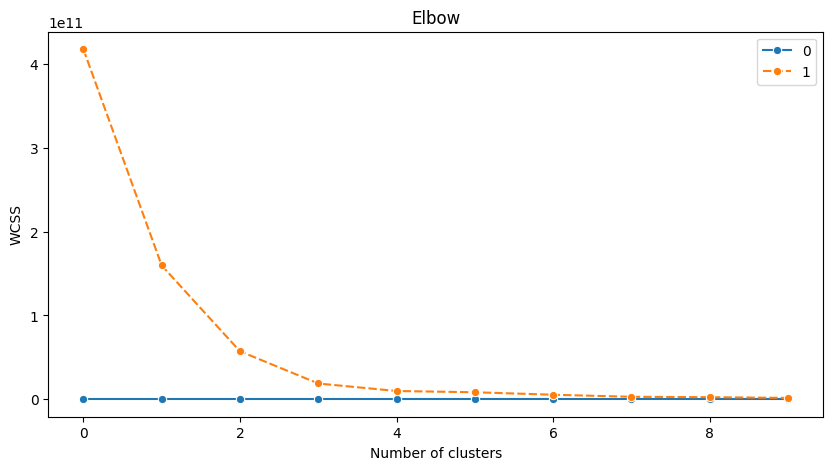

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49900 (\N{HANGUL SYLLABLE SIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure

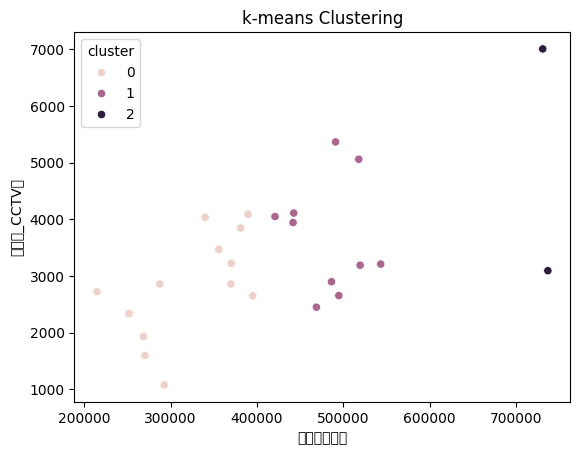

In [47]:


labels = y_cluster_kmeans

X["cluster"] = labels

sns.scatterplot(x="총생활인구수", y="안심이_CCTV수", data=X, hue="cluster")

plt.title('k-means Clustering')
plt.xlabel("총생활인구수")
plt.ylabel("안심이_CCTV수")

# 그래프 출력
plt.show()